In [6]:
# Step 1: Create databases with all the data

# Step 2: Enrich datasets: Extract positive comments, negative comments, objectivity

# Step 3: Summarize datasets

In [36]:
from helpers import GoogleSheet, Database, dataframe_to_text_file
from dotenv import load_dotenv
import os
from prompts import ArticlePromptCreator

load_dotenv()

google_sheet_id = os.getenv('GOOGLE_SHEET_ID')



-----------------INSTRUCTIONS START -----------------------
Assume you are a world class journalist that is carrying out research about the new Pixel 7a launch. 
You are very organized and want to highlight and tag articles to later process them further.

Read the article (from ARTICLE START to ARTICLE END) and extract quotes with their respective tags. 
If there is no information that can be added to a tag, do not return that tag. Only use the following tags: 

Features-Camera: Statements mentioning the Pixel 7a camera or photographic capabilities.
Features-Battery: Statements mentioning the Pixel 7a battery or battery capabilities (including charging).
Features-Build-Quality: Statements mentioning the Pixel 7a build quality (including how premium or not it feels).
Features-Gaming: Statements mentoning the Pixel 7a gaming capabilities. 
Features-Screen: Statements mentoning the screen quality, bezels, brightness, colour range. 
Pricing: Statements mentoning whether the Pixel 7a is we

In [2]:
gs = GoogleSheet('sheets-service-account.json', google_sheet_id)
articles = gs.to_dataframe('articles')
reddit = gs.to_dataframe('reddit')
youtube = gs.to_dataframe('youtube')

In [3]:
articles.head(1)

,author/0,author/1,publisher,url,description,text,softTitle,date,title
0,Shikhar Mehrotra,,ScreenRant,https://screenrant.com/google-pixel-7a-every-c...,Google has released the Pixel 7a in four gorge...,Google has released the Pixel 7a in four gorge...,Google Pixel 7a Colors: Which One Should You Get?,2023-05-21T17:00:15.000Z,Which One Should You Get?


# Agent approach

In [5]:
# Create corpus 
dataframe_to_text_file(articles, './data/articles.txt')

In [1]:
# Create vector store
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI, VectorDBQA
llm = OpenAI(temperature=0)

from langchain.document_loaders import TextLoader
loader = TextLoader('./data/articles.txt')
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=800)
texts = text_splitter.split_documents(documents)

embeddings = OpenAIEmbeddings()
docsearch = Chroma.from_documents(texts, embeddings, collection_name="articles")

Created a chunk of size 2243, which is longer than the specified 800
Created a chunk of size 2104, which is longer than the specified 800
Created a chunk of size 4305, which is longer than the specified 800
Created a chunk of size 836, which is longer than the specified 800
Created a chunk of size 2879, which is longer than the specified 800
Created a chunk of size 1021, which is longer than the specified 800
Created a chunk of size 1047, which is longer than the specified 800
Created a chunk of size 1194, which is longer than the specified 800
Created a chunk of size 3591, which is longer than the specified 800
Created a chunk of size 1046, which is longer than the specified 800
Created a chunk of size 840, which is longer than the specified 800
Created a chunk of size 994, which is longer than the specified 800
Created a chunk of size 867, which is longer than the specified 800
Created a chunk of size 1035, which is longer than the specified 800
Created a chunk of size 16296, which i

: 

: 

In [5]:
from langchain.chains import RetrievalQA

In [6]:
articles = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=docsearch.as_retriever())

In [7]:
# Import things that are needed generically
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain.tools import BaseTool
from langchain.llms import OpenAI
from langchain import LLMMathChain, SerpAPIWrapper

In [16]:
tools = [
    Tool(
        name = "Pixel 7a QA system",
        func=articles.run,
        description="useful for when you need to answer questions about the Pixel 7a launch. Input should be a fully formed question."
    )
]

In [17]:
# Construct the agent. We will use the default agent type here.
# See documentation for a full list of options.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

In [19]:
agent.run("List the top 5 things the press is mentioning as possitive about the P7a launch, list the top 5 negative things.")



> Entering new AgentExecutor chain...
 I need to find out what the press is saying about the P7a launch.
Action: Pixel 7a QA system
Action Input: What is the press saying about the P7a launch?
Observation:  The press is saying that the Pixel 7a is an eagerly awaited announcement at the Google I/O 2023 event and that it is expected to take the Pixel 6a up to a whole new level.
Thought: I need to find out what the top 5 positive and negative things the press is saying about the P7a launch.
Action: Pixel 7a QA system
Action Input: What are the top 5 positive and negative things the press is saying about the P7a launch?
Observation:  Positive: 
1. Price-to-performance ratio is without parallel 
2. Best deal in the Android world 
3. Google Assistant is very useful 
4. Good battery life 
5. Almost made it through 24hrs with excessive social media scrolling 

Negative: 
1. Battery life could be better 
2. No optical zoom or macro photo mode 
3. Face unlock option not as secure as some rival

'The top 5 positive things the press is saying about the P7a launch are: 1. Price-to-performance ratio is without parallel, 2. Best deal in the Android world, 3. Google Assistant is very useful, 4. Good battery life, 5. Almost made it through 24hrs with excessive social media scrolling. The top 5 negative things the press is saying about the P7a launch are: 1. Battery life could be better, 2. No optical zoom or macro photo mode, 3. Face unlock option not as secure as some rivals, 4. Fairly slow charging, 5. Not as good battery life as the more expensive Samsung Galaxy S23.'

In [22]:
agent.run("Compare the Pixel 7a vs previous models. List top 5 similarities, top 5 differences. Return answer as two lists.")



> Entering new AgentExecutor chain...
 I need to compare the Pixel 7a to previous models.
Action: Pixel 7a QA system
Action Input: Compare the Pixel 7a to previous models.
Observation:  The Pixel 7a has a similar design to the Pixel 6a, with a 6.1-inch OLED screen, relatively thick bezels, a punch-hole camera cutout, no headphone jack, no microSD card expansion slots, and the usual button placement on all sides. The Pixel 7a has a metal camera bar and a 3D Metal Visor that blends with the anodized aluminum side frame of the phone. The Pixel 7a was announced on 10 May at Google I/O and it was made available immediately after. The Pixel 6a remains in the Pixel line-up.
Thought: I need to list the similarities and differences between the Pixel 7a and previous models.
Action: Pixel 7a QA system
Action Input: List the similarities and differences between the Pixel 7a and previous models.
Observation:  The Pixel 7a and Pixel 6a have similar design features, including 6.1-inch OLED screens,

'Similarities: 6.1-inch OLED screen, thick bezels, punch-hole camera cutout, no headphone jack, no microSD card expansion slots, and the usual button placement on all sides.\nDifferences: Pixel 7a has Face Unlock, core features of a Pixel phone such as excellent image processing and AI-based features, cinematic blur and 4K30 video on its ultrawide and selfie cameras, faster wired and wireless charging, and a marginally larger display.'

In [23]:
agent.run("Compare the Pixel 7a vs competitors (specifically samsung or apple). List top 5 similarities, top 5 differences. Return answer as two lists.")



> Entering new AgentExecutor chain...
 I need to compare the Pixel 7a to competitors
Action: Pixel 7a QA system
Action Input: Compare the Pixel 7a to competitors
Observation:  The Pixel 7a offers all the core features of a Pixel phone such as excellent image processing and AI-based features, while costing less than competitors. It may be a good choice for those interested in Google’s premium smartphone experience, but not for those who covet powerful processing capabilities or fast charging speeds.
Thought: I need to list the similarities and differences
Action: Pixel 7a QA system
Action Input: List the similarities and differences between the Pixel 7a and competitors
Observation:  The Pixel 7a and competitors have similar 6.1-inch OLED screens, relatively thick bezels, punch-hole camera cutouts, no headphone jacks, no microSD card expansion slots, and the usual button placement on all sides. The Pixel 7a has Face Unlock, while competitors may not. The Pixel 7a offers the same powerf

'The top 5 similarities between the Pixel 7a and competitors are: 6.1-inch OLED screens, relatively thick bezels, punch-hole camera cutouts, no headphone jacks, no microSD card expansion slots, and the usual button placement on all sides. The top 5 differences are: Face Unlock, plastic back, lower-tier hardware with a smaller sensor size, faster wired and wireless charging, and glass drop protection and water resistance.'

In [24]:
agent.run("What did the Pixel 7a articles say about recent industry trends in the smartphone industry.")



> Entering new AgentExecutor chain...
 I should look for articles about the Pixel 7a launch.
Action: Pixel 7a QA system
Action Input: What did the Pixel 7a articles say about recent industry trends in the smartphone industry?
Observation:  The articles said that the Google Pixel 7a stands out in the competitive mid-range smartphone market as a device that delivers exceptional value for its price, and that Google has struck a near-perfect balance with its hardware and software features to make it a great choice for most people in 2023.
Thought: I now know the final answer.
Final Answer: The articles said that the Google Pixel 7a stands out in the competitive mid-range smartphone market as a device that delivers exceptional value for its price, and that Google has struck a near-perfect balance with its hardware and software features to make it a great choice for most people in 2023.

> Finished chain.


'The articles said that the Google Pixel 7a stands out in the competitive mid-range smartphone market as a device that delivers exceptional value for its price, and that Google has struck a near-perfect balance with its hardware and software features to make it a great choice for most people in 2023.'

# Prompt approach

In [3]:
prompt_creator = ArticlePromptCreator(articles.iloc[0].text)
print(prompt_creator.create_prompt())



-----------------INSTRUCTIONS START -----------------------
Assume you are a world class journalist that is carrying out research about the new Pixel 7a launch. 
You are very organized and want to highlight and tag articles to later process them further.

Read the article (from ARTICLE START to ARTICLE END) and extract quotes with their respective tags. 
If there is no information that can be added to a tag, do not return that tag. Only use the following tags: 

Features-Camera: Statements mentioning the Pixel 7a camera or photographic capabilities.
Features-Battery: Statements mentioning the Pixel 7a battery or battery capabilities (including charging).
Features-Build-Quality: Statements mentioning the Pixel 7a build quality (including how premium or not it feels).
Features-Gaming: Statements mentoning the Pixel 7a gaming capabilities. 
Features-Screen: Statements mentoning the screen quality, bezels, brightness, colour range. 
Pricing: Statements mentoning whether the Pixel 7a is we

# Summarization method - Best representation vectors

In [1]:
from langchain.document_loaders import TextLoader
from langchain import OpenAI

llm = OpenAI(temperature=0)

# Load the book
loader = TextLoader('./data/articles.txt')
documents = loader.load()

# Combine the pages, and replace the tabs with spaces
text = ""

for document in documents:
    text += document.page_content
    
text = text.replace('\t', ' ')

num_tokens = llm.get_num_tokens(text)

print (f"This text has {num_tokens} tokens in it")


This text has 140604 tokens in it


In [2]:
# Loaders
from langchain.schema import Document

# Splitters
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Model
from langchain.chat_models import ChatOpenAI

# Embedding Support
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

# Data Science
import numpy as np
from sklearn.cluster import KMeans

In [28]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t",".",""], chunk_size=4000, chunk_overlap=400)

docs = text_splitter.create_documents([text])

In [29]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 172 documents


In [30]:
docs[5]

Document(page_content="Google's Pixel 7a arrives a year after the iPhone SE's release, and it boasts a few premium features of its own, starting with AI-powered features supported by the Tensor G2 chipset inside the phone. The Pixel 7a also delivers outstanding photography in its own right, and Google has added a few premium features you wouldn't expect to see in a device that costs less than $500.\n\nWhich phone caught our eye when we compared these low-cost devices side by side? Here's how our Google Pixel 7a vs. iPhone SE face-off went down.\n\nThe Pixel 7a costs $499, a $50 price hike over what Google charged for the Pixel 6a when that phone debuted last year. While Google still kept the price under $500, the increase only widens the price gap between Google's midrange device and the iPhone SE. Apple charges $429 for the base model SE — a $70 discount off the Pixel 7a.\n\nThen again, price differences can be misleading. That $429 iPhone SE only comes with 64GB of storage. To match 

In [31]:
embeddings = OpenAIEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

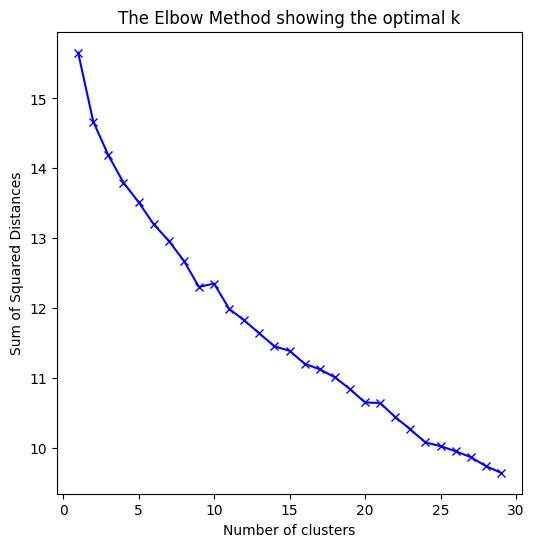

In [33]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

# Using iris dataset for example
X = vectors

# Set range for potential number of clusters
range_n_clusters = list(range(1,30))

# List to hold the sum of squared distances
ssd = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    # The inertia method returns sum of squared distances of samples to their closest cluster center
    ssd.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(6,6))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [34]:
# Assuming 'embeddings' is a list or array of 1536-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~10 was the best.
# Usually if you have 10 passages from a book you can tell what it's about
num_clusters = 20

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

In [35]:
kmeans.labels_

array([ 8,  7,  7,  6, 16, 16, 16, 16, 16,  8,  2,  6,  6,  2, 15,  1, 18,
        0,  0,  3, 13, 14, 15,  1,  0,  5, 17, 17,  6,  6,  6,  6, 18, 18,
       13,  8, 15,  9, 12, 17, 15,  6,  3,  6, 15,  2,  6,  0, 12, 13,  3,
        3,  2,  9, 15,  1, 12, 12,  5,  2,  1,  9,  5,  9, 15,  9,  9,  5,
        5,  6,  2,  6,  3,  2,  5,  5,  5,  5, 11, 15,  1, 12,  0,  5,  4,
        2,  9,  5, 12,  3,  1,  5,  5,  2,  1,  5,  3,  8,  5,  8,  6, 12,
        8,  2,  2,  2, 15,  5,  2,  2,  3,  1,  3,  3,  3,  3,  3, 15,  6,
        3,  3,  5,  5, 19, 19, 19,  1, 10, 10,  1,  3,  5,  3,  8,  9, 12,
        5,  2,  5,  5,  5,  3,  8,  8,  2, 10,  2,  2,  5,  5,  2,  3,  3,
        2, 12,  2,  8,  8,  1,  3, 17,  0,  6,  1,  1,  3,  2,  6,  6,  6,
        2,  3], dtype=int32)

In [36]:
vectors = np.array(vectors)

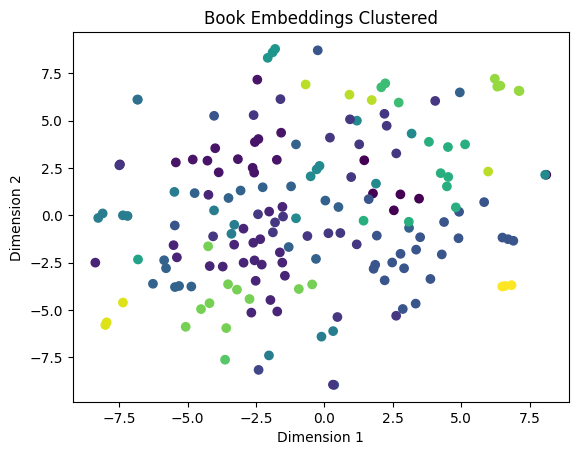

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [38]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)
    
    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [39]:
selected_indices = sorted(closest_indices)
selected_indices

[1,
 3,
 4,
 20,
 21,
 27,
 33,
 47,
 48,
 53,
 62,
 78,
 79,
 84,
 105,
 114,
 125,
 145,
 156,
 163]

In [40]:
llm3 = ChatOpenAI(temperature=0,
                 max_tokens=1000,
                 model='gpt-3.5-turbo'
                )

In [41]:
from langchain import PromptTemplate
map_prompt = """
You will be given a short extract of an article. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least one paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [42]:
map_chain = load_summarize_chain(llm=llm3,
                             chain_type="stuff",
                             prompt=map_prompt_template)

In [43]:
selected_docs = [docs[doc] for doc in selected_indices]


In [44]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):
    
    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])
    
    # Append that summary to your list
    summary_list.append(chunk_summary)
    
    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")

Summary #0 (chunk #1) - Preview: The HTC U23 Pro and Google Pixel 7a are two mid-range smartphones with some key differences. The Pixel 7a has a 90Hz refresh rate, which is an improvement from previous models, and a 6.1-inch OLED display. The HTC U23 Pro has a larger 6.7-inch OLED d 

Summary #1 (chunk #3) - Preview: The Google Pixel 7 and Pixel 7a have similar camera specifications, but the Pixel 7 has more features such as cinematic blur and faster charging. The Pixel 7 also has a slightly larger display and better glass drop protection and water resistance. Ho 

Summary #2 (chunk #4) - Preview: The article compares the Google Pixel 7a and the iPhone SE 2022, both of which are low-cost phones. The Pixel 7a's main camera lacks some sharpness and produces slightly punchier colors, but its new ultrawide camera fits more into the shot and perfor 

Summary #3 (chunk #20) - Preview: The Google Pixel 7a supports 18W wired and 7.5W wireless charging, which is a first for an affordable Pixel 

In [45]:
summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 3619 tokens


In [66]:
llm4 = ChatOpenAI(temperature=0,
                 max_tokens=4000,
                 model='gpt-4',
                 request_timeout=120
                )

In [72]:
combine_prompt = """
You are a award winning tech journalist known for publishing balanced and insightful articles.
You will be given a series of summaries from a recent phone launch. The summaries will be enclosed in triple backticks (```)
Your goal is to create a podcast script in the style of Ben Thompson (from Stratechery).
The reader should be able to get insights about the new Pixel launch and the direction Google is taking with their phones.
Make sure your podcast script lists both favourable and unfavourable perspectives about the new Pixel launch. Be specific when comparing against competition (especially against Samsung and Apple).
Make sure to call out the following: 1) When was the phone launched, 2) Key attributes, 3) Positive comments from other articles, 4) Negative comments from other articles, 5) Google strategy

```{text}```
PODCAST SCRIPT
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [73]:
reduce_chain = load_summarize_chain(llm=llm4,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
                            verbose=True # Set this to true if you want to see the inner workings
                                   )

In [74]:
output4 = reduce_chain.run([summaries])



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

You are a award winning tech journalist known for publishing balanced and insightful articles.
You will be given a series of summaries from a recent phone launch. The summaries will be enclosed in triple backticks (```)
Your goal is to create a podcast script in the style of Ben Thompson (from Stratechery).
The reader should be able to get insights about the new Pixel launch and the direction Google is taking with their phones.
Make sure your podcast script lists both favourable and unfavourable perspectives about the new Pixel launch. Be specific when comparing against competition (especially against Samsung and Apple).
Make sure to call out the following: 1) When was the phone launched, 2) Key attributes, 3) Positive comments from other articles, 4) Negative comments from other articles, 5) Google strategy

```The HTC U23 Pro and Google Pixel 7a are two mid-range smartphones wit

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=120.0).
Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 2.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=120.0).
Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=120.0).
Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=120.


> Finished chain.

> Finished chain.


In [75]:
print (output4)

Welcome to the Stratechery podcast, where we dive deep into the world of technology and analyze the latest trends and products. I'm your host, and today we'll be discussing the recent launch of Google's Pixel 7a, comparing it to its competition, and exploring Google's strategy with their phones. Let's get started.

Google unveiled the Pixel 7a at Google I/O 2023, a mid-range smartphone that offers flagship features at a lower price point. The phone boasts a 6.1-inch OLED display with a 90Hz refresh rate, Google's Tensor G2 chip, and an impressive camera setup, including a 64MP main sensor and a 13MP ultrawide lens. Priced at $499, the Pixel 7a is set to compete with the likes of the iPhone SE 2022 and Samsung Galaxy A54 5G.

Positive comments from other articles highlight the Pixel 7a's camera capabilities, which are incredibly capable due to the Tensor G2-powered AI prowess. The phone's design has also been praised for its sleek and modern look, staying faithful to the chic Pixel temp